# Calculating yields

In [27]:
from cameo import load_model, fba
model_original = load_model('data/iJO1366.xml.gz')

## Product yield

In [28]:
model = model_original.copy()

Calculating the yield of a product is straigtforward. First one sets the producing reaction a new objective of the model.

In [29]:
model.objective = model.reactions.EX_ac_e

Then one determines the maximum production flux by solving the model.

In [30]:
model.solve()
model.reactions.EX_ac_e.flux

29.093467336683354

Dividing the production flux by the uptake flux of the carbon source (in this case glucose) yields the molar yield (mol product / mol glucose).

In [31]:
model.reactions.EX_ac_e.flux / (-1. * model.reactions.EX_glc__D_e.flux)

2.909346733668335

## Exercise

* Convert the yield into a C-mol (product) / C-mol (carbon source) yield.
* Calculate a mass yield instead of molar yield (g (product) / g (carbon source))

## Biomass yield

In [34]:
model = model_original.copy()

In [35]:
model.solve()
gDW_biomass_per_mmol_glucose = model.reactions.BIOMASS_Ec_iJO1366_core_53p95M.flux / (-1. * model.reactions.EX_glc__D_e.flux)
gDW_biomass_per_mmol_glucose

0.09823718127269779

The units of this yield are gDW (Biomass) / mmol (glucose). We can convert this number into a mass yield by doing the following conversion.

In [36]:
gDW_biomass_per_g_glucose = gDW_biomass_per_mmol_glucose * (1000 / model.metabolites.glc__D_e.formula_weight)
gDW_biomass_per_g_glucose

0.5452898971307392

# Growth vs. Product yield

In [37]:
model = model_original.copy()

In the previous section we calculated theoretical maximum yields in the absence of competing objectives. But how does product yield vary with growth for example?

In [38]:
from numpy import array, linspace

In [39]:
growth_rates = linspace(0, model.solve().objective_value , 10)
growth_rates

array([ 0.        ,  0.10915242,  0.21830485,  0.32745727,  0.43660969,
        0.54576212,  0.65491454,  0.76406697,  0.87321939,  0.98237181])

In [40]:
product_fluxes = []
model.objective = model.reactions.EX_ac_e
for growth in growth_rates:
    model.reactions.BIOMASS_Ec_iJO1366_core_53p95M.change_bounds(growth, growth)
    product_fluxes.append(model.solve().objective_value)
product_fluxes = array(product_fluxes)

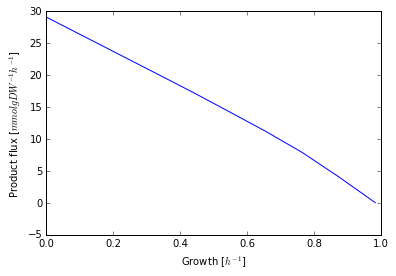

In [41]:
import matplotlib.pyplot as plt
plt.plot(growth_rates, product_fluxes)
plt.xlabel('Growth [$h^{-1}$]')
plt.ylabel('Product flux [$mmol gDW^{-1} h^{-1}$]')
plt.show()

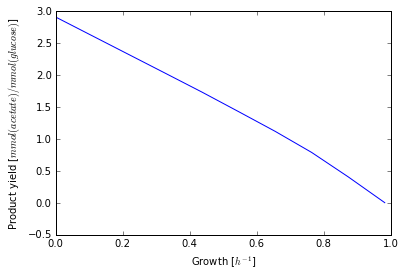

In [42]:
plt.plot(growth_rates, product_fluxes / (-1 * model.reactions.EX_glc__D_e.flux))
plt.xlabel('Growth [$h^{-1}$]')
plt.ylabel('Product yield [$mmol(acetate) / mmol(glucose)$]')
plt.show()